<a href="https://colab.research.google.com/github/mhabib80/Sample-Projects/blob/master/Titanic_Logistic_Reression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Data Science/CodeAcademy/titanic/train.csv')
test = pd.read_csv('/content/drive/My Drive/Data Science/CodeAcademy/titanic/test.csv')

In [ ]:
# Feature sex
train['Female?'] = np.where(train.Sex == 'female', 1, 0) #convert Sex to 1,0

In [ ]:
# Feature Age
train['Age'].fillna(train.Age.mean(), inplace=True) #missing Age values

# #normalize age values
# age = np.asarray(train.Age).reshape(-1, 1)
# age_n = preprocessing.StandardScaler().fit_transform(age)
# train['age_n'] = age_n

In [ ]:
# Feature PClass one-hot encoding
train = pd.concat([train, pd.get_dummies(train['Pclass'].values, prefix='Class', prefix_sep='_')], axis=1)

In [ ]:
x = np.asarray(train[['Age', 'Female?', 'Class_1', 'Class_2', 'Class_3']]) #Female, age and class only
y = np.asarray(train['Survived']) #Target Variable

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)

In [ ]:
print('Training data score=', lr.score(x_train, y_train), '\nTesting Data Score = ', lr.score(x_test, y_test) , '\nCoefficients =', lr.coef_)

Training data score= 0.797752808988764 
Testing Data Score =  0.8044692737430168 
Coefficients = [[-0.45104207  1.25507711  0.55286643  0.10075806 -0.55835488]]


In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_hat)
cm

array([[92, 14],
       [21, 52]])

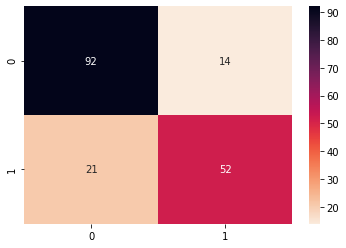

In [ ]:
sns.heatmap(cm, cmap = 'rocket_r' ,annot=True);

In [ ]:
print(metrics.classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       106
           1       0.79      0.71      0.75        73

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
# Predicting sample cases
JR = np.array([[20, 0, 0, 0, 1], [17, 1, 1, 0, 0]])
JR = preprocessing.StandardScaler().fit_transform(JR)
lr.predict(JR), lr.predict_proba(JR)

(array([0, 1]), array([[0.97095298, 0.02904702],
        [0.1066602 , 0.8933398 ]]))

In [ ]:
#Using Logistic regression with Cross Validation
from sklearn.linear_model import LogisticRegressionCV
lr_CV = LogisticRegressionCV(10)
lr_CV.fit(x_train, y_train)
y_cv_hat = lr_CV.predict(x_test)
print('Training data score=', lr_CV.score(x_train, y_train), '\nTesting Data Score = ', lr_CV.score(x_test, y_test) , '\nCoefficients =', lr_CV.coef_)

Training data score= 0.7991573033707865 
Testing Data Score =  0.7821229050279329 
Coefficients = [[-0.32771963  1.03377736  0.44169667  0.09363123 -0.45677028]]


In [ ]:
#Alternativel to do cross validation by hand:
from sklearn.model_selection import cross_val_score
model = LogisticRegression()
scores=cross_val_score(model, x_train, y_train, cv=4)#to cross_validate the model with four non-overlapping splits of the training data
scores

array([0.76966292, 0.78089888, 0.79213483, 0.80337079])